In [3]:
%pylab inline
import networkx as nx
from shapely.geometry import Polygon, Point

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [4]:
### Candiates

def rotate_trans(x, t, th):
    (x,y) = x
    (tx, ty) = t
    return x * cos(th) - y * sin(th) + tx, x * sin(th) + y * cos(th) + ty

def point_in_set(p, s, delta=.1):
    for cp in s:
        if math.hypot(p[1] - cp[1], p[0] - cp[0]) < delta:
            return True
    return False
        

def candidate(n1, n2, pos, C):
    # Best 
    b = (0.5, 0.8660254037844386)
    # Edge vector
    vx, vy = np.array(n1) - np.array(n2) 
    c = rotate_trans(b, n2, math.atan2(vy, vx))
    
    # If there is node or a candidate in that point    
    if point_in_set(c, pos.values()) or point_in_set(c, C):
        vx, vy = np.array(n2) - np.array(n1)
        c = rotate_trans(b, n1, math.atan2(vy, vx))
        
        #print point_in_set(c, pos.values()) or point_in_set(c, C), c
        #print C
        # If the second point also has a node
        if point_in_set(c, pos.values()) or point_in_set(c, C):
            return None
        
    return c

# Initial graph
The initial graph is formed by fully connected three vertices.

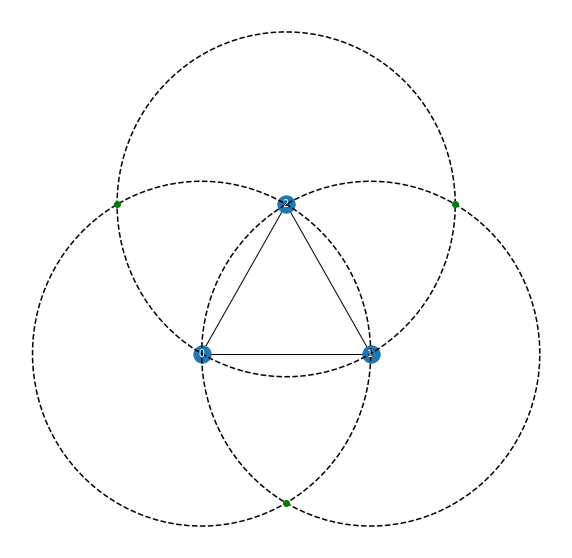

In [6]:

def initial_graph():
    G = nx.Graph()
    G.add_node(0)
    G.add_node(1)
    G.add_node(2)
    G.add_edge(0,1)
    G.add_edge(1,2)
    G.add_edge(2,0)
    pos = {0:(0,0), 1:(1,0), 2: (.5, sqrt(1-.5**2))}

        
    return G, pos

def init_candidates(pos, pol=Polygon([(-100,-100), (100,-100), (100,100), (-100,100)])):
    C = []
    
    c1 = candidate(pos[1], pos[2], pos, C)
    c2 = candidate(pos[2], pos[0],pos, C)
    c3 = candidate(pos[0], pos[1], pos, C)
    C = [c1, c2, c3] 
    
    # Filter by polygon
    C = [ci for ci in C if pol.contains(Point(ci))]
        
    return C

######### Draw
# Radio
def draw_comm_radio(pos):
    th = np.linspace(0,2*math.pi, 100)
    for vx, vy in pos.values():
        #circle
        plt.plot(vx + np.cos(th), vy + np.sin(th), 'k--')

def draw_network(G, C, pos, comm_radio=True):
    if comm_radio:
        draw_comm_radio(pos)
    for (cx, cy) in C:
        plt.plot(cx, cy, 'go')

    nx.draw(G, pos=pos, with_labels=True, font_color='w')

def draw_polygon(P):
    px, py = np.array(P+[P[0]]).T
    plt.plot(px, py)  


G, pos = initial_graph()
# initial candidates
C = init_candidates(pos)


# Draw graph
draw_network(G, C, pos)


# Environment
The environment is bounded by a polygon

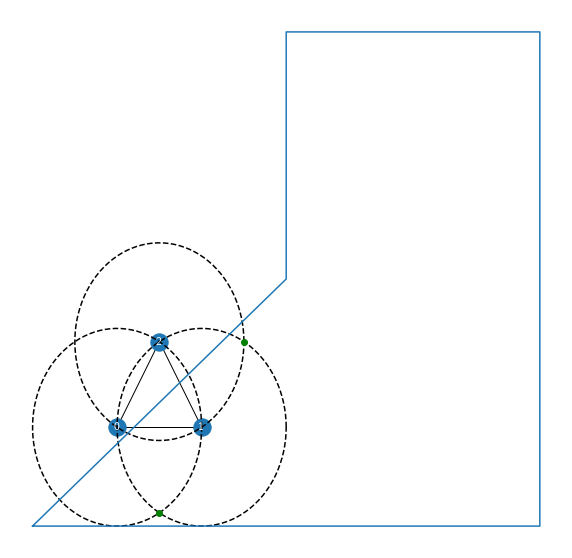

In [7]:

P = [(-1,-1), (5,-1), (5, 4), (2, 4), (2,1.5)]


C = init_candidates(pos, Polygon(P))
# Draw graph
draw_network(G, C, pos)
draw_polygon(P)


# Expand network

In [8]:
# Select candidate
def add_node(G, C, pos, P, cp):
    # Neighbors of the candidate
    cand_neigh = [v for v, p in pos.items() if math.hypot(p[1] - cp[1], p[0] - cp[0]) < 1.1]    

    # New node
    vk = len(G.nodes())
    # Edges
    for vj in cand_neigh:
        G.add_edge(vk, vj)
    # Position
    pos[vk] = cp

    # choose two neighbors
    min1, min2 = 1000, 1000
    v1, v2 = None, None
    for vi in cand_neigh:
        s = 0  # sum
        for vj in cand_neigh:        
            s += (vi, vj) in G.edges() or (vj, vi) in G.edges()        

        if s < min1:
            min1 = s
            v1 = vi
        elif s < min2:
            min2 = s
            v2 = vi

    #print v1, v2, vk
    ### New candidates
    c1 = candidate(pos[v1], pos[vk], pos, C)
    c2 = candidate(pos[vk], pos[v2], pos, C)

    spolygon = Polygon(P)
    if c1 is not None and spolygon.contains(Point(c1)):
        # Score candidate
        C.append(c1)
        
    if c2 is not None and spolygon.contains(Point(c2)):
        # Score candidate
        C.append(c2)
        
        


#add_node(C.pop(0))
#draw_network()

In [9]:
G, pos = initial_graph()
# initial candidates
C = init_candidates(pos)

while C:
    add_node(G, C, pos, C.pop(0))
draw_network(G, C, pos)
draw_polygon(P)

plt.xlim([-3,6])
plt.ylim([-3,6])


#plt.sa

TypeError: add_node() missing 1 required positional argument: 'cp'

(-3.0, 6.0)

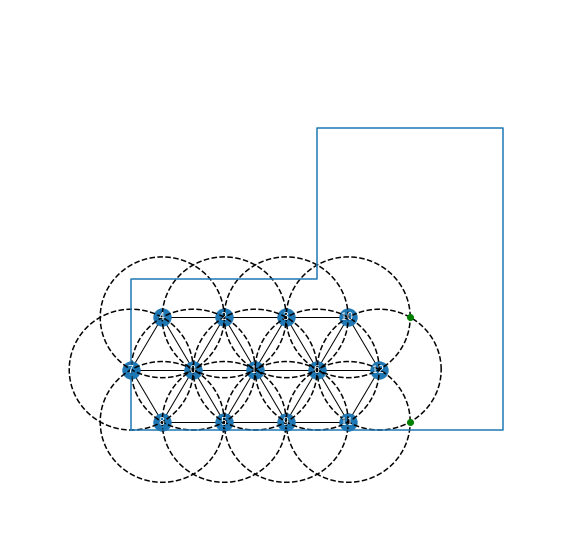

In [10]:
def deploy_network(P, n1=10):
    
    # Init network
    G, pos = initial_graph()
    # initial candidates
    C = init_candidates(pos, Polygon(P))
    

    # Fill of nodes
    for i in range(n1):
        if C:
            add_node(G, C, pos, P, C.pop(0))
    
    # Draw
    draw_network(G, C, pos)
    draw_polygon(P)

    
    
P = [(-1,-1), (5,-1), (5, 4), (2, 4), (2,1.5), (-1, 1.5)]
deploy_network(P)
plt.xlim([-3,6])
plt.ylim([-3,6])



(-3.0, 6.0)

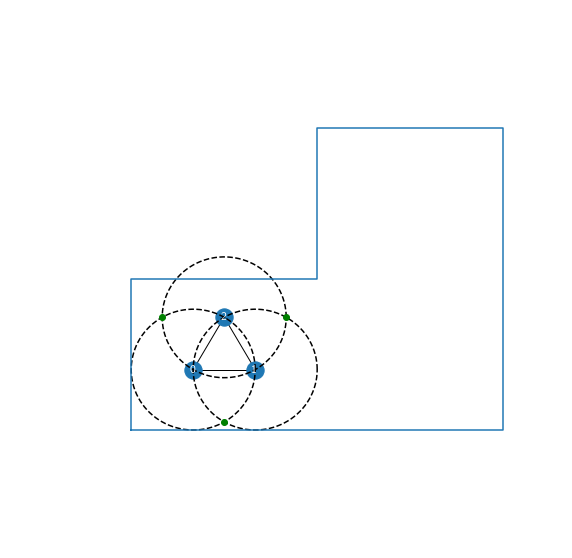

In [11]:
deploy_network(P, 0)
plt.xlim([-3,6])
plt.ylim([-3,6])

(-3.0, 6.0)

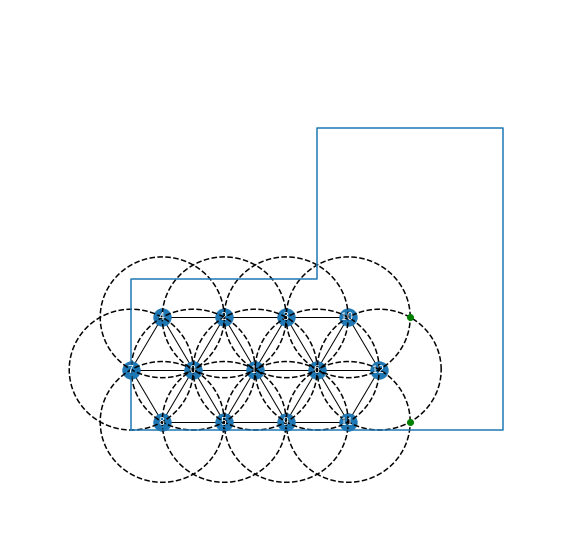

In [12]:
deploy_network(P, 10)
plt.xlim([-3,6])
plt.ylim([-3,6])

(-3.0, 6.0)

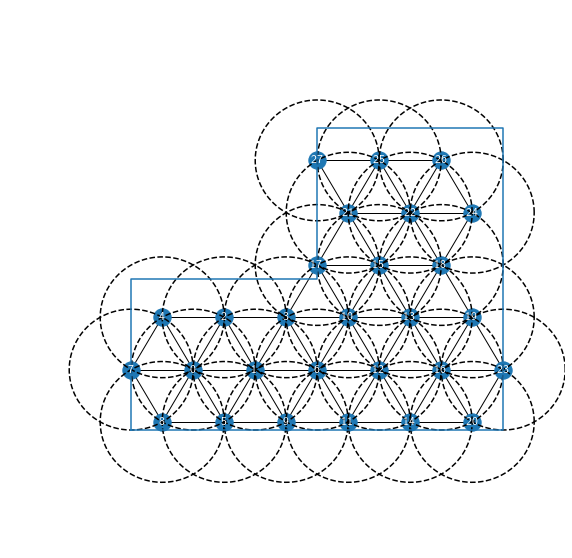

In [13]:
deploy_network(P, 100)
plt.xlim([-3,6])
plt.ylim([-3,6])

(-3.0, 6.0)

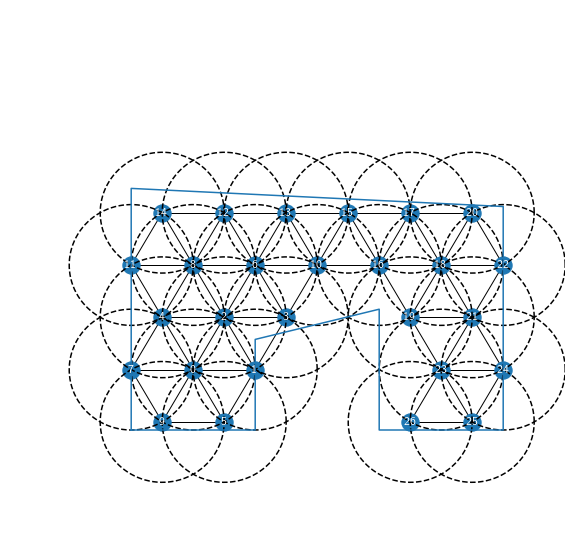

In [14]:
P = [(-1,-1), (1,-1), (1, .5), (3, 1), (3,-1), (5, -1), (5, 2.7), (-1, 3)]
deploy_network(P, 100)
plt.xlim([-3,6])
plt.ylim([-3,6])

(-3.0, 6.0)

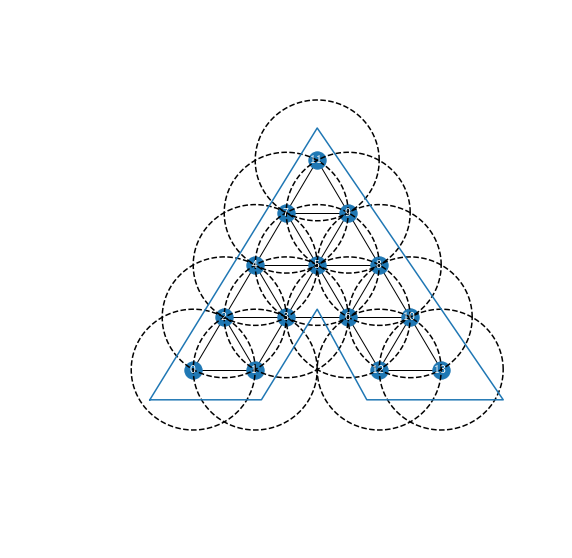

In [15]:
P = [(-.7,-.5),
     (1.1,-.5),
     (2, 1.),
     (2.8, -.5),
     (5,-.5),
     (2, 4)]
deploy_network(P, 100)
plt.xlim([-3,6])
plt.ylim([-3,6])

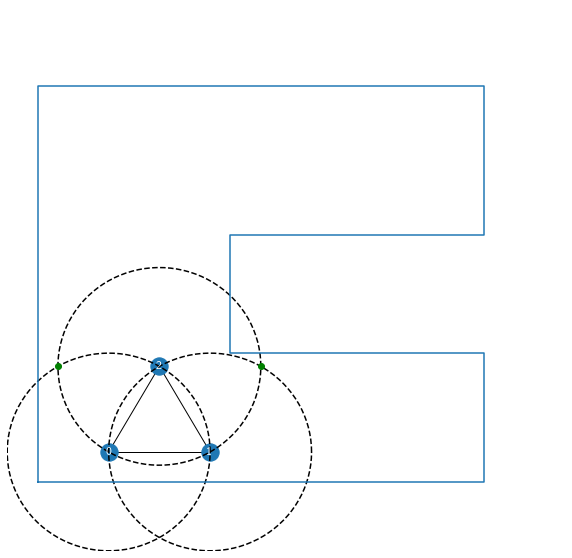

In [16]:
P = [(-.7, -.3),
     (3.7, -.3),
     (3.7, 1.),
     (1.2, 1.),
     (1.2, 2.2),
     (3.7, 2.2),
     (3.7, 3.7),
     (-.7, 3.7)]
deploy_network(P, 0)
plt.xlim([-.7, 3.8])
plt.ylim([-.7, 3.8])
plt.xlim([-1,4.5])
plt.ylim([-1,4.5])

plt.savefig('netc3.pdf', bbox_inches='tight')

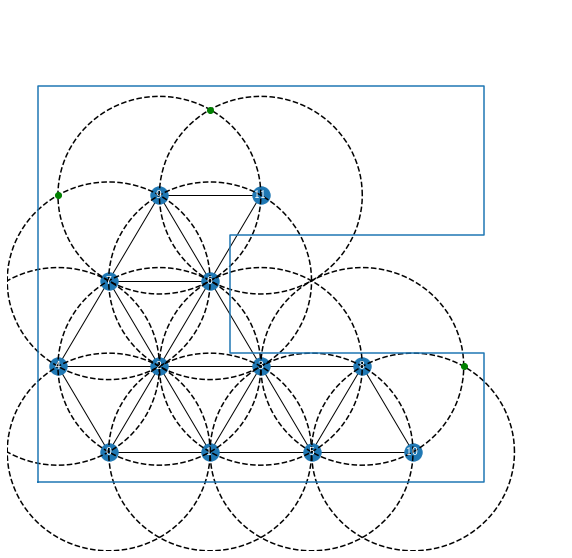

In [17]:
deploy_network(P, 9)
plt.xlim([-1,4.5])
plt.ylim([-1,4.5])


plt.savefig('netc12.pdf', bbox_inches='tight')

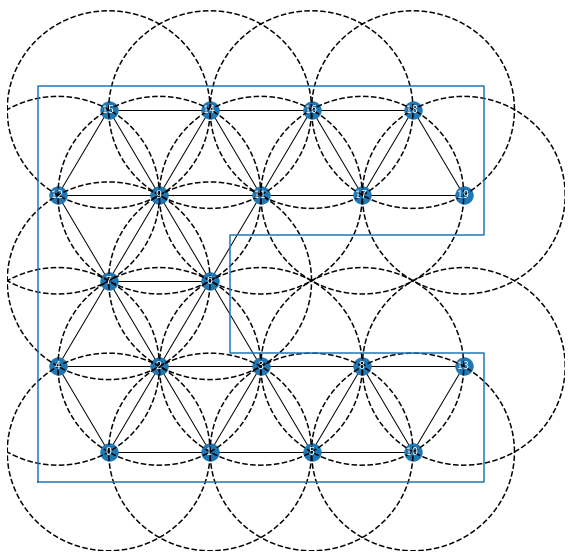

In [18]:
deploy_network(P, 100)
plt.xlim([-1,4.5])
plt.ylim([-1,4.5])

plt.savefig('netcall.pdf', bbox_inches='tight')